### BEA GDP by Industry

[BEA API User Guide](https://apps.bea.gov/api/_pdf/bea_web_service_api_user_guide.pdf) //
[Dataset Description](https://www.bea.gov/data/gdp/gdp-industry)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup as bs

# import pd_helpers as pdh

import warnings
warnings.filterwarnings("ignore")

In [6]:
my_key = 'DE3995C1-1AEB-482A-87F7-FA0C297DF14B'

In [7]:
# get table descriptions
url = f'https://apps.bea.gov/api/data/?&UserID={my_key}&method=GetParameterValues&DataSetName=underlyingGDPbyIndustry&ParameterName=TableID&ResultFormat=xml'
call_xml = requests.get(url).text
call_soup = bs(call_xml, 'lxml')
call_list = [[line['desc'], line['key']] for line in call_soup.find_all('paramvalue')]
call_df = pd.DataFrame(data=call_list, columns=['desc', 'key'])

tables = call_df.copy()
call_df

,desc,key
0,U.Value Added by Industry (A),210
1,U.Value added by Industry as a Percentage of G...,211
2,U.Chain-Type Quantity Indexes for Value Added ...,212
3,U.Percent Changes in Chain-Type Quantity Index...,213
4,U.Real Value Added by Industry (A),214
5,U.Chain-Type Price Indexes for Value Added by ...,215
6,U.Percent Changes in Chain-Type Price Indexes ...,216
7,U.Contributions to Percent Change in Real Gros...,217
8,U.Contributions to Percent Change in the Chain...,218
9,U.Gross Output by Industry (A),219


In [8]:
# get frequency parameters
url = f'https://apps.bea.gov/api/data/?&UserID={my_key}&method=GetParameterValues&DataSetName=underlyingGDPbyIndustry&ParameterName=Frequency&ResultFormat=xml'
call_xml = requests.get(url).text
call_soup = bs(call_xml, 'lxml')
call_list = [[line['desc'], line['key']] for line in call_soup.find_all('paramvalue')]
call_df = pd.DataFrame(data=call_list, columns=['desc', 'key'])

call_df

,desc,key
0,Annual,A


In [9]:
# get last year published
url = f'https://apps.bea.gov/api/data/?&UserID={my_key}&method=GetParameterValues&DataSetName=underlyingGDPbyIndustry&ParameterName=Year&ResultFormat=xml'
call_xml = requests.get(url).text
call_soup = bs(call_xml, 'lxml')
call_list = [[line['desc'], line['key']] for line in call_soup.find_all('paramvalue')]
call_df = pd.DataFrame(data=call_list, columns=['desc', 'key'])

call_df['desc'].max()

'2023'

In [10]:
# get industry parameters
url = f'https://apps.bea.gov/api/data/?&UserID={my_key}&method=GetParameterValues&DataSetName=underlyingGDPbyIndustry&ParameterName=Industry&ResultFormat=xml'
call_xml = requests.get(url).text
call_soup = bs(call_xml, 'lxml')
call_list = [[line['desc'], line['key']] for line in call_soup.find_all('paramvalue')]
call_df = pd.DataFrame(data=call_list, columns=['desc', 'key'])

industry_keys = call_df.copy()
# call_df.to_csv('cortland/industry_keys.csv') # exported to csv

# industry = 'ALL'
# industry = '23' # construction
# industry = '23OR' # Other residential construction (excludes maintenance/repairs and single family homes)
# industry = '23SF' # Single-family residential structures
# industry = '53' # Real estate and rental and leasing
# industry = '532RL' # Rental and leasing services and lessors of intangible assets
# industry = 'HS' # federal housing GDP

In [11]:
# select params
datasetname = 'underlyingGDPbyIndustry'
tableid = 'ALL' 
industries = ['23', '23SF', '23OR', '53', '532RL', 'HS']
industry = ','.join(industries)
year = 'ALL'
frequency = 'A'

# call API
url = f"https://apps.bea.gov/api/data/?&UserID={my_key}&method=getdata&datasetname={datasetname}&tableid={tableid}&Industry={industry}&Year={year}&Frequency={frequency}&ResultFormat=XML"
call_xml = requests.get(url).text
call_soup = bs(call_xml, 'lxml')

# print the xml so i can see how to parse it
# with open('cortland/call_xml.txt', 'w') as f:
#     f.write(call_xml)

# parse XML
call_list = [[line['tableid'], line['year'], line['industry'], line['datavalue']] for line in call_soup.find_all('data')]
call_df = pd.DataFrame(data=call_list, columns=['tableid', 'year', 'industry', 'value'])
call_df = call_df.astype({'tableid': int, 'year': int, 'industry': str, 'value': float})

df = call_df.copy()
call_df

,tableid,year,industry,value
0,210,1997,23,339.6
1,210,1997,23OR,54.4
2,210,1997,23SF,71.7
3,210,1997,53,1035.2
4,210,1997,532RL,106.0
...,...,...,...,...
3349,236,2023,23OR,204.5
3350,236,2023,23SF,131.8
3351,236,2023,53,1390.0
3352,236,2023,532RL,252.0


In [12]:
tables1 = tables.astype({'desc': str, 'key': int}).set_index('key')['desc']
print(tables1.head(3))

df['tablename'] = df['tableid'].map(tables1)
df.head(3)

key
210                        U.Value Added by Industry (A)
211    U.Value added by Industry as a Percentage of G...
212    U.Chain-Type Quantity Indexes for Value Added ...
Name: desc, dtype: object


,tableid,year,industry,value,tablename
0,210,1997,23,339.6,U.Value Added by Industry (A)
1,210,1997,23OR,54.4,U.Value Added by Industry (A)
2,210,1997,23SF,71.7,U.Value Added by Industry (A)


In [13]:
industry_keys1 = industry_keys.astype({'desc': str, 'key': str}).set_index('key')['desc']
industry_keys1 = industry_keys1.loc[industries]
df['industryname'] = df['industry'].map(industry_keys1)
df.head(3)

,tableid,year,industry,value,tablename,industryname
0,210,1997,23,339.6,U.Value Added by Industry (A),"Construction (A,Q)"
1,210,1997,23OR,54.4,U.Value Added by Industry (A),"Other residential construction (A,Q)"
2,210,1997,23SF,71.7,U.Value Added by Industry (A),"Single-family residential structures (A,Q)"


In [14]:
df = df.pivot(index=['year', 'industryname'], columns='tablename', values='value').reset_index()
df.head(3)

tablename,year,industryname,U.Chain-Type Price Indexes for Gross Output by Industry (A),U.Chain-Type Price Indexes for Intermediate Inputs by Industry (A),U.Chain-Type Price Indexes for Value Added by Industry (A),U.Chain-Type Quantity Indexes for Gross Output by Industry (A),U.Chain-Type Quantity Indexes for Intermediate Inputs by Industry (A),U.Chain-Type Quantity Indexes for Value Added by Industry (A),U.Contributions to Percent Change in Real Gross Domestic Product by Industry (A),U.Contributions to Percent Change in the Chain-Type Price Index for Gross Domestic Product by Industry (A),...,U.Percent Changes in Chain-Type Price Indexes for Intermediate Inputs by Industry (A),U.Percent Changes in Chain-Type Price Indexes for Value Added by Industry (A),U.Percent Changes in Chain-Type Quantity Indexes for Gross Output by Industry (A),U.Percent Changes in Chain-Type Quantity Indexes for Intermediate Inputs by Industry (A),U.Percent Changes in Chain-Type Quantity Indexes for Value Added by Industry (A),U.Real Gross Output by Industry (A),U.Real Intermediate Inputs by Industry (A),U.Real Value Added by Industry (A),U.Value Added by Industry (A),U.Value added by Industry as a Percentage of Gross Domestic Product (A)
0,1997,"Construction (A,Q)",50.779,62.027,41.586,88.497,80.758,97.178,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1396.5,595.8,816.5,339.6,4.0
1,1997,"Housing (A,Q)",58.181,57.565,58.312,72.505,64.172,73.536,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1474.5,152.9,1320.2,769.8,9.0
2,1997,"Other residential construction (A,Q)",52.499,61.764,43.867,71.015,61.871,82.500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,231.7,108.9,123.9,54.4,0.6


In [15]:
# df.to_excel('cortland/bea_gdp_by_industry.xlsx', index=False)

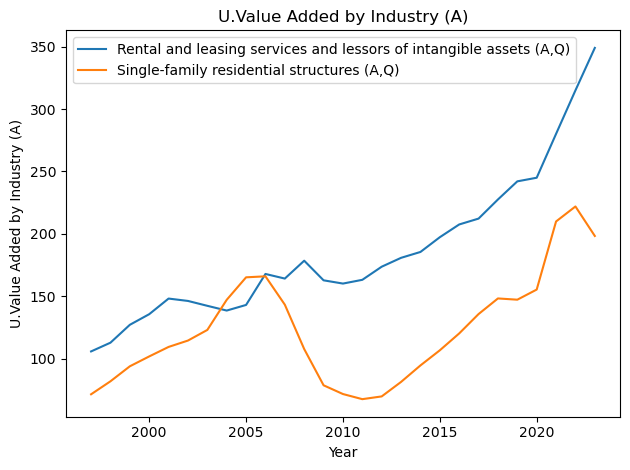

In [16]:
# filter industries
df1 = df[df['industryname'].isin(['Rental and leasing services and lessors of intangible assets (A,Q)', 'Single-family residential structures (A,Q)'])]

col = 'U.Value Added by Industry (A)'

df1 = df1.groupby(['industryname', 'year'])[col].sum().unstack('industryname')

ax = df1.plot(kind='line', title=col)
ax.set_ylabel(col)
ax.set_xlabel('Year')
plt.legend()
plt.tight_layout()
plt.show()

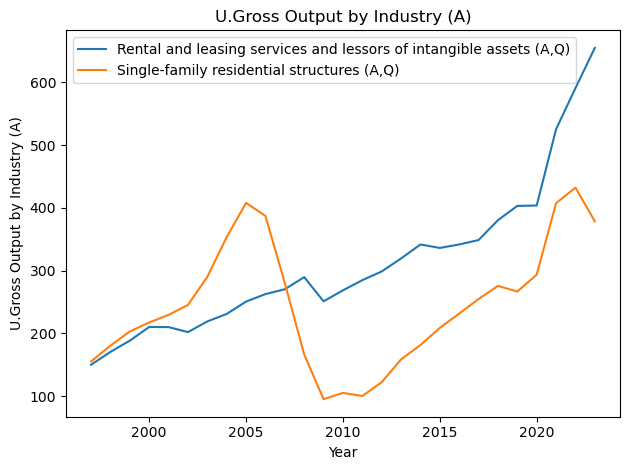

In [17]:
# filter industries
df1 = df[df['industryname'].isin(['Rental and leasing services and lessors of intangible assets (A,Q)', 'Single-family residential structures (A,Q)'])]

col = 'U.Gross Output by Industry (A)'

df1 = df1.groupby(['industryname', 'year'])[col].sum().unstack('industryname')

ax = df1.plot(kind='line', title=col)
ax.set_ylabel(col)
ax.set_xlabel('Year')
plt.legend()
plt.tight_layout()
plt.show()

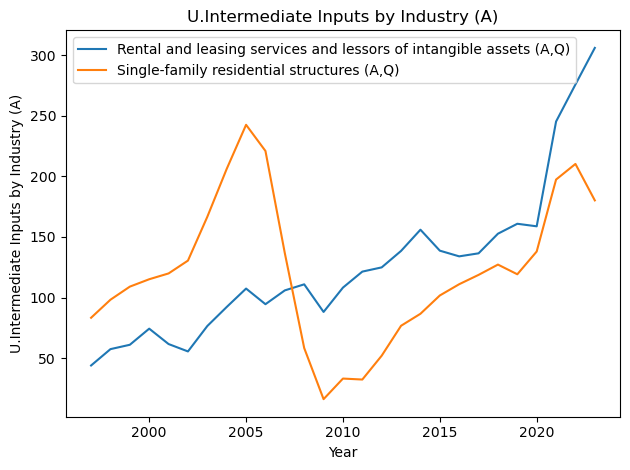

In [18]:
# filter industries
df1 = df[df['industryname'].isin(['Rental and leasing services and lessors of intangible assets (A,Q)', 'Single-family residential structures (A,Q)'])]

col = 'U.Intermediate Inputs by Industry (A)'

df1 = df1.groupby(['industryname', 'year'])[col].sum().unstack('industryname')

ax = df1.plot(kind='line', title=col)
ax.set_ylabel(col)
ax.set_xlabel('Year')
plt.legend()
plt.tight_layout()
plt.show()